Step: 0   Time: 0.000500


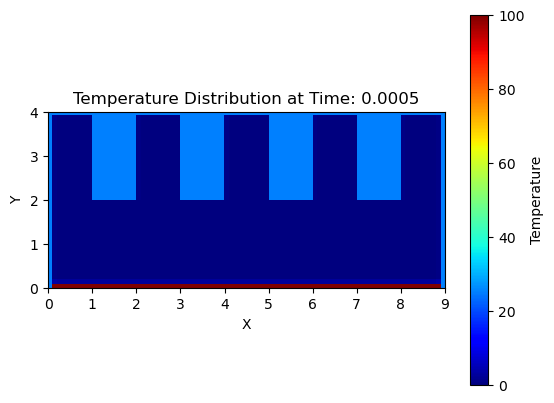

Step: 50   Time: 0.025500
Step: 100   Time: 0.050500
Step: 150   Time: 0.075500
Step: 200   Time: 0.100500
Step: 250   Time: 0.125500
Step: 300   Time: 0.150500
Step: 350   Time: 0.175500
Step: 400   Time: 0.200500
Step: 450   Time: 0.225500
Step: 500   Time: 0.250500


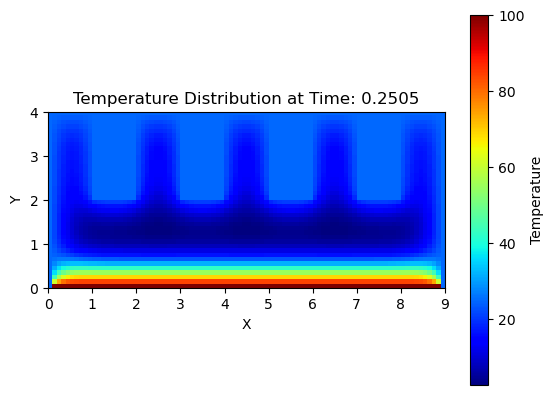

Step: 550   Time: 0.275500
Step: 600   Time: 0.300500
Step: 650   Time: 0.325500
Step: 700   Time: 0.350500
Step: 750   Time: 0.375500
Step: 800   Time: 0.400500
Step: 850   Time: 0.425500
Step: 900   Time: 0.450500
Step: 950   Time: 0.475500
Step: 1000   Time: 0.500500


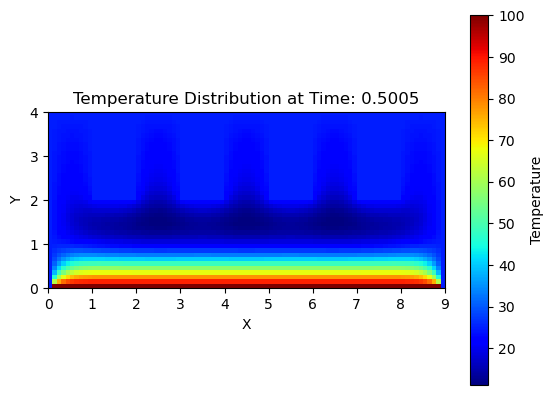

Step: 1050   Time: 0.525500
Step: 1100   Time: 0.550500
Step: 1150   Time: 0.575500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
Lx = 9.0  # Domain length in x-direction
Ly = 4.0  # Domain length in y-direction
nx = 90   # Number of nodes in x-direction
ny = 40   # Number of nodes in y-direction

dt = 0.0005  # Time step
num_time_steps = 10000
Time = 0

# Generate non-uniform grid
x_nodes = np.linspace(0, Lx, nx)
y_nodes = np.linspace(0, Ly, ny)

# Initialize temperature field
temperature = np.zeros((ny, nx))
temperature_new = np.copy(temperature)

thermal_conductivity = np.zeros((ny, nx))

# Set thermal conductivity based on x position
for i in range(0, nx-1):
    for j in range(0, ny-1):
        if x_nodes[i] <= Lx / 3.0:
            thermal_conductivity[j, i] = 1.0
        elif x_nodes[i] <= 2 * Lx / 3.0:
            thermal_conductivity[j, i] = 1.0
        elif x_nodes[i] > 2 * Lx / 3.0:
            thermal_conductivity[j, i] = 1.0

# Time-stepping loop
for step in range(num_time_steps):
    Time = Time + dt

    # Set boundary conditions
    temperature[0, :] = temperature_new[0, :] = 100.0  # Bottom wall
    temperature[ny-1, :] = temperature_new[ny-1, :] = 25.0   # Top wall
    temperature[:, 0] = temperature_new[:, 0] = 25.0   # Left wall
    temperature[:, nx-1] = temperature_new[:, nx-1] = 25.0 # Right wall

    for i in range(1, nx-1):
        for j in range(1, ny-1):
            
            if   x_nodes[i] >= 1 and  x_nodes[i] <= 2 and y_nodes[j] >=2: 
                 temperature[j, i] = 25
            elif   x_nodes[i] >= 3 and  x_nodes[i] <= 4 and y_nodes[j] >=2: 
                 temperature[j, i] = 25                    
            elif   x_nodes[i] >= 5 and  x_nodes[i] <= 6 and y_nodes[j] >=2: 
                 temperature[j, i] = 25                                        
            elif   x_nodes[i] >= 7 and  x_nodes[i] <= 8 and y_nodes[j] >=2: 
                 temperature[j, i] = 25                                                            
                       
            # Calculate Galerkin coefficients for the diffusion term
            dx = x_nodes[i + 1] - x_nodes[i]
            dy = y_nodes[j + 1] - y_nodes[j]

            alpha_x = thermal_conductivity[j, i] / (dx ** 2)
            alpha_y = thermal_conductivity[j, i] / (dy ** 2)

            # Calculate the Laplacian using Galerkin method
            laplacian = (
                alpha_x * (temperature[j,i + 1] - 2 * temperature[j, i] + temperature[j,i - 1]) +
                alpha_y * (temperature[j + 1,i] - 2 * temperature[j, i] + temperature[j - 1,i])
            )

            # Update temperature using the Crank-Nicolson time-stepping scheme (second-order)
            temperature_new[j, i] = (
                temperature[j, i] + 0.5 * dt * laplacian +
                0.25 * dt**2 * ((alpha_x + alpha_y) * laplacian)
            )
            
            if   x_nodes[i] >= 1 and  x_nodes[i] <= 2 and y_nodes[j] >=2: 
                 temperature_new[j, i] = 25
            elif   x_nodes[i] >= 3 and  x_nodes[i] <= 4 and y_nodes[j] >=2: 
                 temperature_new[j, i] = 25                    
            elif   x_nodes[i] >= 5 and  x_nodes[i] <= 6 and y_nodes[j] >=2: 
                 temperature_new[j, i] = 25                                        
            elif   x_nodes[i] >= 7 and  x_nodes[i] <= 8 and y_nodes[j] >=2: 
                 temperature_new[j, i] = 25            
            
            
    # Update the temperature field
    temperature = np.copy(temperature_new)

    if step % 50 == 0:  # Print every 50 time steps
        print(f"Step: {step}   Time: {Time:.6f}")

    if step % 500 == 0:  # Plot every 500 time steps
        plt.imshow(temperature, cmap='jet', origin='lower', extent=[0, Lx, 0, Ly])
        plt.colorbar(label='Temperature')
        plt.title(f"Temperature Distribution at Time: {Time:.4f}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.pause(0.1)
        plt.clf()  # Clear the plot for the next iteration

plt.show()  # Show the final plot after the loop
